# **Neural network regression with tensorflow**

In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf

2024-07-08 14:31:48.649961: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 14:31:48.657807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 14:31:48.667338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 14:31:48.667355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 14:31:48.674345: I tensorflow/core/platform/cpu_feature_gua

In [3]:
print(tf.__version__)

2.16.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

## **Generating datasets**

In [5]:
# Create features
X = np.arange(start = -7, stop = 15, step = 3, dtype = 'float32')

In [6]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

In [7]:
# Create labels
y = np.arange(start = 3, stop = 25, step = 3, dtype = 'float32')

In [8]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)

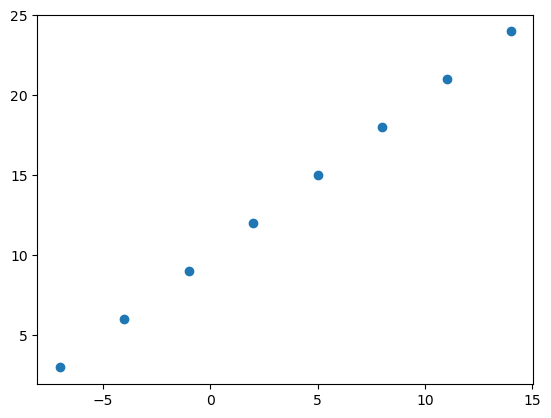

In [9]:
plt.scatter(X, y)
plt.show()

In [10]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
X = tf.constant(X)

2024-07-08 14:31:50.836861: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:31:50.869602: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:31:50.869675: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:31:50.872615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:31:50.872675: I external/local_xla/xla/stream_executor

In [12]:
y = tf.constant(y)

## **Creating a model**

In [13]:
tf.random.set_seed(42)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [16]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 15.8407 - mae: 15.8407
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.5594 - mae: 15.5594
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.2782 - mae: 15.2782
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.9969 - mae: 14.9969
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.7954 - mae: 14.7954


I0000 00:00:1720441911.590063  112224 service.cc:145] XLA service 0x7f7fbc019e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720441911.590114  112224 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-08 14:31:51.597468: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-08 14:31:51.621162: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720441911.722239  112224 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [17]:
y_pred = model.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [18]:
y_pred

array([[-5.8028374]], dtype=float32)

## **Improving the model**

#### **Inrease number of epochs**

In [19]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [20]:
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [21]:
model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 19.6262 - mae: 19.6262
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.3449 - mae: 19.3449
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.0637 - mae: 19.0637
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.7824 - mae: 18.7824
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.5012 - mae: 18.5012
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.2199 - mae: 18.2199
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.9387 - mae: 17.9387
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.6574 - mae: 17.6574
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.3762 - mae: 17.3762
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.0949 - mae: 17.0949
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.8137 - mae: 16.8137
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.5324 - mae: 16.5324
Epoch 13/100
1/1 ━━━━━━━

In [22]:
y_pred2 = model2.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [23]:
y_pred2

array([[29.204271]], dtype=float32)

#### **Add extra hidden layer**

In [24]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [25]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [26]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 13.2458 - mae: 13.2458
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6658 - mae: 12.6658
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.0812 - mae: 12.0812
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4865 - mae: 11.4865
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8773 - mae: 10.8773
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2460 - mae: 10.2460
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.5870 - mae: 9.5870
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9087 - mae: 8.9087
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1915 - mae: 8.1915
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.4286 - mae: 7.4286
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6160 - mae: 6.6160
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7437 - mae: 5.7437
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [27]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [28]:
y_pred3

array([[32.325016]], dtype=float32)

#### **Some more changes**

1. Decreasing numbers of neurons in the first hidden layer

In [29]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [30]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [31]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 12.9124 - mae: 12.9124
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.4104 - mae: 12.4104
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9040 - mae: 11.9040
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.3906 - mae: 11.3906
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.8675 - mae: 10.8675
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.3319 - mae: 10.3319
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7813 - mae: 9.7813
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.2127 - mae: 9.2127
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.6233 - mae: 8.6233
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.0100 - mae: 8.0100
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.3696 - mae: 7.3696
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.2263 - mae: 7.2263
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [32]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [33]:
y_pred3

array([[30.167562]], dtype=float32)

2. Change optimizer function to Adam with default arguments

In [34]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [35]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

In [36]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 12.4018 - mae: 12.4018
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.3301 - mae: 12.3301
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.2584 - mae: 12.2584
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.1866 - mae: 12.1866
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.1148 - mae: 12.1148
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0430 - mae: 12.0430
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9712 - mae: 11.9712
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8993 - mae: 11.8993
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8273 - mae: 11.8273
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.7553 - mae: 11.7553
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.6833 - mae: 11.6833
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.6112 - mae: 11.6112
Epoch 13/100
1/1 ━━━━━━━

In [37]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [38]:
y_pred

array([[-5.8028374]], dtype=float32)

3. Set learning rate to 0.01 for Adam optimizer

In [39]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [40]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [41]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - loss: 14.1783 - mae: 14.1783
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.4942 - mae: 13.4942
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.8126 - mae: 12.8126
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.1305 - mae: 12.1305
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.4460 - mae: 11.4460
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.7568 - mae: 10.7568
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.0605 - mae: 10.0605
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3547 - mae: 9.3547
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.6368 - mae: 8.6368
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9040 - mae: 7.9040
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1538 - mae: 7.1538
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6277 - mae: 6.6277
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [42]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [43]:
y_pred3

array([[26.748404]], dtype=float32)

## **Evaluating a model**

In [45]:
X2 = tf.range(-100, 100, 4)

In [46]:
X2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [47]:
y2 = X2 + 10

In [49]:
y2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

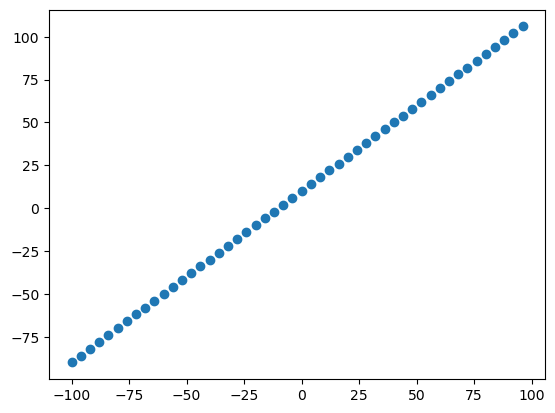

In [50]:
plt.scatter(X2, y2)
plt.show()

In [ ]:
tf.split